#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

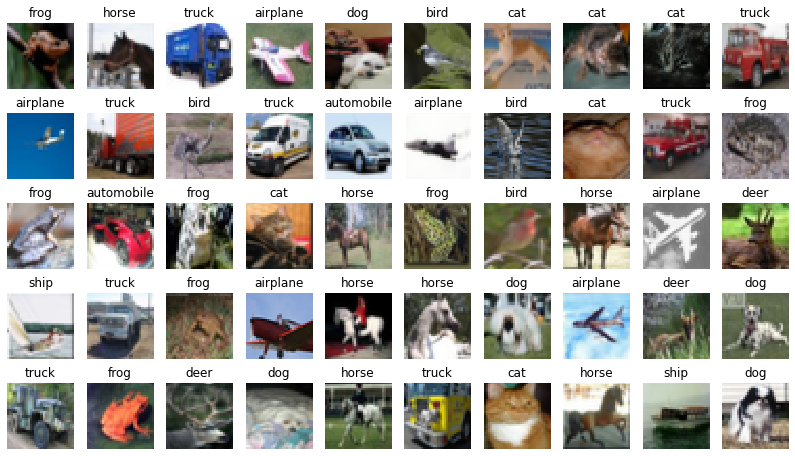

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

#axis=0: mean of every features among all the instances
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train-mean)/std     #[TO COMPLETE]
X_valid = (X_valid-mean)/std     #[TO COMPLETE]
X_test = (X_test-mean)/std      #[TO COMPLETE]


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 12s 6ms/step - loss: 1.4583 - accuracy: 0.4929 - val_loss: 1.2259 - val_accuracy: 0.5754
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1452 - accuracy: 0.6065 - val_loss: 1.1003 - val_accuracy: 0.6162
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0245 - accuracy: 0.6486 - val_loss: 1.0524 - val_accuracy: 0.6410
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 0.9525 - accuracy: 0.6724 - val_loss: 1.0455 - val_accuracy: 0.6392
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 0.9030 - accuracy: 0.6905 - val_loss: 1.0112 - val_accuracy: 0.6554
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8653 - accuracy: 0.7035 - val_loss: 1.0238 - val_accuracy: 0.6530
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8298 - accuracy: 0.7142 - val_loss: 1.0146 - val_accuracy: 0.6526
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0605 - accuracy: 0.6464 - 673ms/epoch - 2ms/step
accuracy: 64.64%


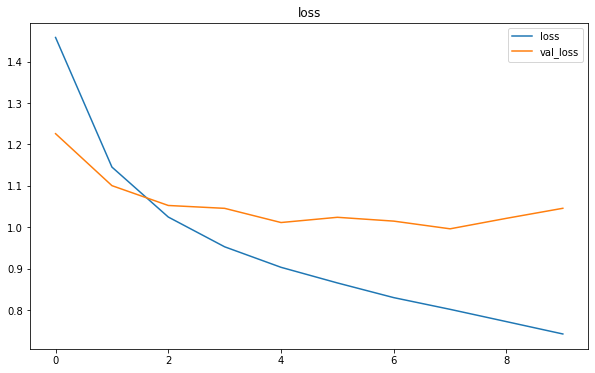

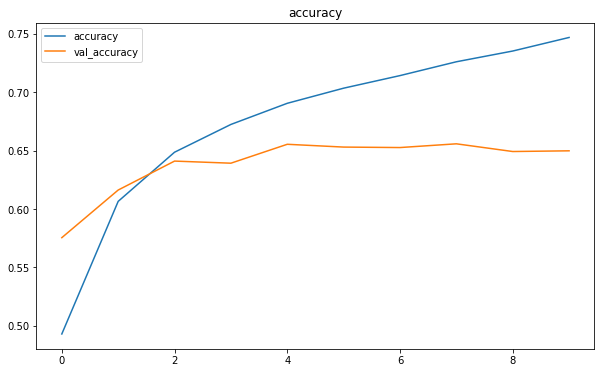

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

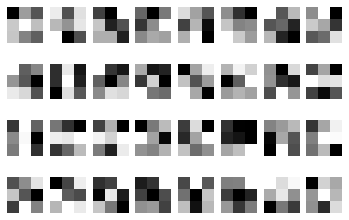

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   Since we have to compute a kernel for each input and output filter we can determine the number of parameters of each Conv2D layer in this way: ((m * n * d)+1)* k) (with m=kernel_width, n=kernel_height, d=input_featuresmap, 1=bias, k=kernel_featuresmap).
2.   There are different reasons. First of all, the kernel size and the output features are different. Secondly the number of input features is different. In fact the first convolutional layer has only 3 input features while the second convolutional layer has 32 input features so there are more kernels to compute.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 3s 7ms/step - loss: 1.6034 - accuracy: 0.4272 - val_loss: 1.3517 - val_accuracy: 0.5290
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.3026 - accuracy: 0.5401 - val_loss: 1.2276 - val_accuracy: 0.5796
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1998 - accuracy: 0.5794 - val_loss: 1.1522 - val_accuracy: 0.6014
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1203 - accuracy: 0.6084 - val_loss: 1.0996 - val_accuracy: 0.6178
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0672 - accuracy: 0.6305 - val_loss: 1.0575 - val_accuracy: 0.6390
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0247 - accuracy: 0.6463 - val_loss: 1.0269 - val_accuracy: 0.6432
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9862 - accuracy: 0.6617 - val_loss: 1.0141 - val_accuracy: 0.6548
Epoch 

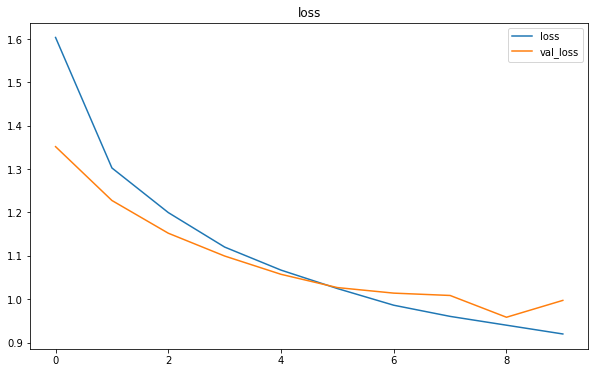

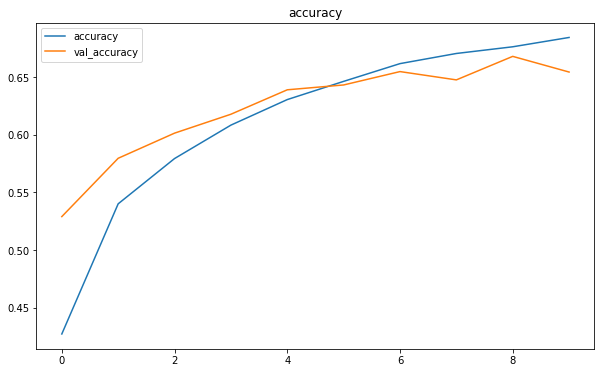

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 3136)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3136)            

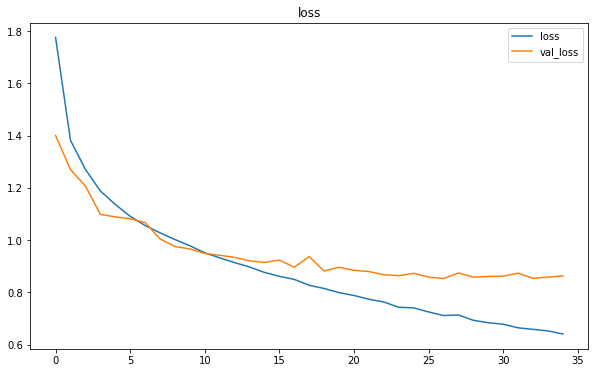

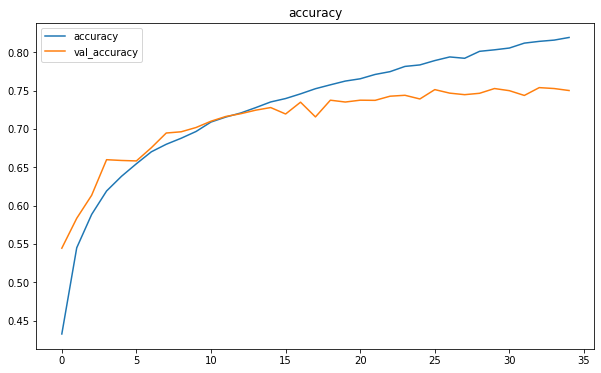

In [31]:
#[TO COMPLETE]
#number of layers
model = keras.models.Sequential([                                
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3], kernel_regularizer='L2'),
    keras.layers.MaxPool2D(pool_size=[2,2], strides=2),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu', kernel_regularizer='L2'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=35, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is pretty different from the previous exercise's network. In particular I made the following changes:
* increased the number of filters of both the convolutional layers
* set L2-kernel-regularization to both the convolutional layers
* added a 100-neurons dense layer before the last 10-neurons dense layer
* added 2 dropout layers before each dense layer
* increased the number of epochs

The achieved accuracy in the test set is 74.14%

Discussion: I started increasing the number of epochs. So I tried to add a new dense layer with 100 neurons without overfitting. Then I tried to increase the number of epochs again and the number of filters of the two convolutional layers until the model started overfitting. To solve this problem I used the argument 'kernel-regularizer=L2' to both the convolutional layers and before each dense layer I added a dropout layer in order to have a regularization effect and to decrease the  model complexity a little bit. As we can see in the evaluation images plotted above, the CNN doesn't overfit.

Besides, I tested also other models (applying the following changes to the previous exercise's network): 
* increased the kernel size of the first convolutional layer - accuracy: 64.71%
* decreased the kernel size of the first convolutional layer - accuracy: 65.37%
* increased the kernel size of the second convolutional layer - accuracy: 65.58%
* decreased the kernel size of the second convolutional layer - accuracy: 62.75%
* changed the activation function of the two convolutional layers to 'elu', 'sigmoid' and 'linear' - accuracy: 65.30% - 55.18% - 64.96%
* removed the first max-pooling layer - accuracy: 65.27%
* removed the second max-pooling layer - accuracy: 65.03%
* removed both the max-pooling layer - accuracy: 58.71%
* added a third convolutional layers equal to the second one - accuracy: 65.34%
* increased the batch-size - accuracy: 64.02% 
* decreased the batch-size - accuracy: 65.87%
* changed the optimizer to 'adagrad', 'RMSprop' and 'SGD' - accuracy: 39.28% - 64.62% - 55.67%


Discussion: when I tried these changes I got overfitting or underfitting models with much worse accuracy than the previous exercise's network. This failed models helped me to understand how to reach a good classifier. In particular I understood that an adaptive learning rate optimizer such as Adam is better than a standard sgd optimizer. In fact Adam merges the effect of adaptive learning rate and the momentum technique. I also understood that removing layers like Max-pooling, which allows us to reduce the complexity of the network, or increasing the number of convolutional layers in the model tends to overfit because of the huge amount of parameters to train which don't allow the model to generalize but learn by memory.